In [151]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# load Kaggle link data
df = pd.read_csv('IRIS.csv')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [152]:
print(df.isnull().sum()) # Zero errors
print(df['species'].value_counts()) # 50-50-50 balance

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


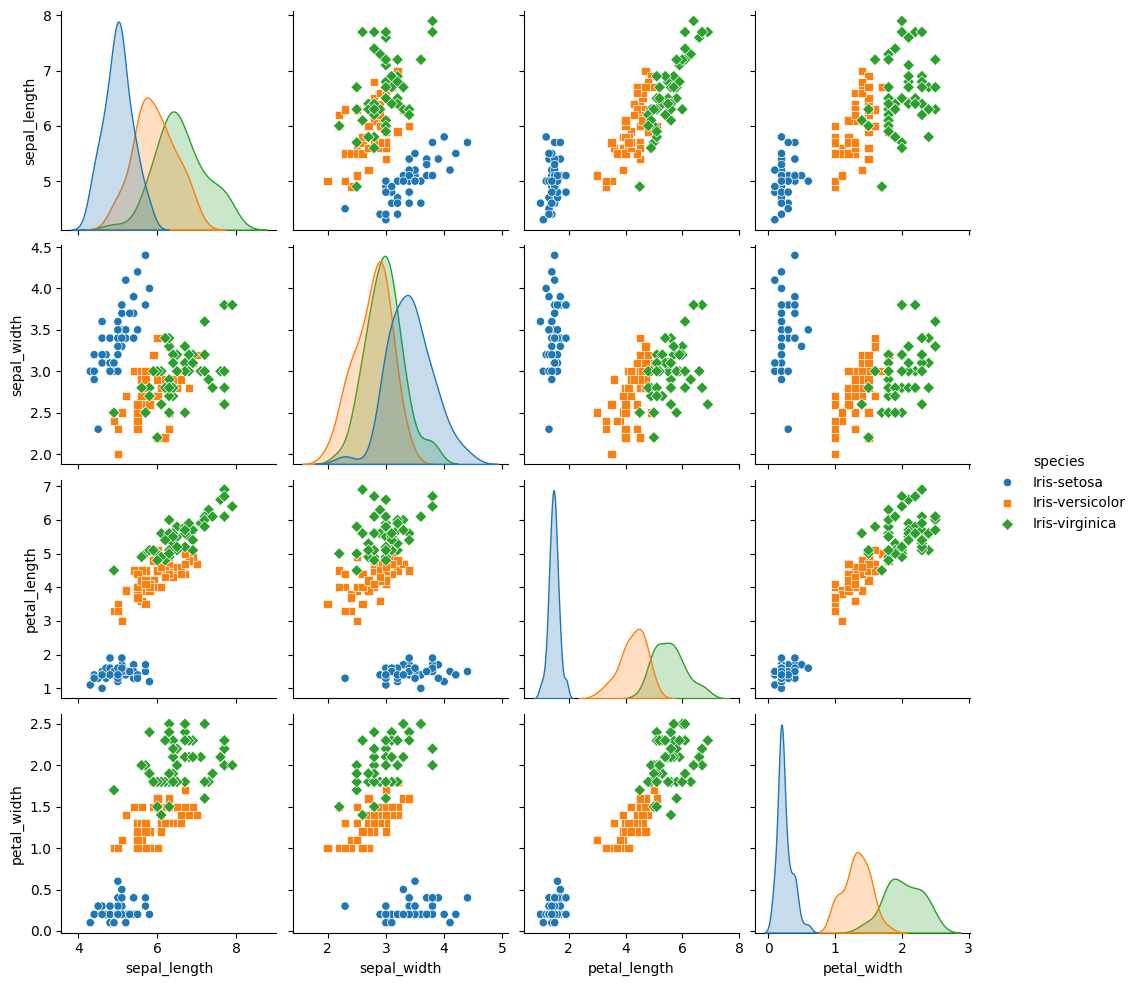

In [153]:
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

In [154]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Step 4: Species (Text) change into numbers
le = LabelEncoder()
# we check the column ka name'species' or 'Species'
target_col = 'species' if 'species' in df.columns else 'Species'

df[target_col] = le.fit_transform(df[target_col])

# Step 5: Data spresd on train or test
X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Step 4 & 5 Done! Data split done.")
print(f"now we have {len(X_train)} .")

Step 4 & 5 Done! Data split done.
now we have 120 .


In [155]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [156]:
predictions = model.predict(X_test)
print(f"Iris Accuracy: {accuracy_score(y_test, predictions)*100:.2f}%")

Iris Accuracy: 100.00%


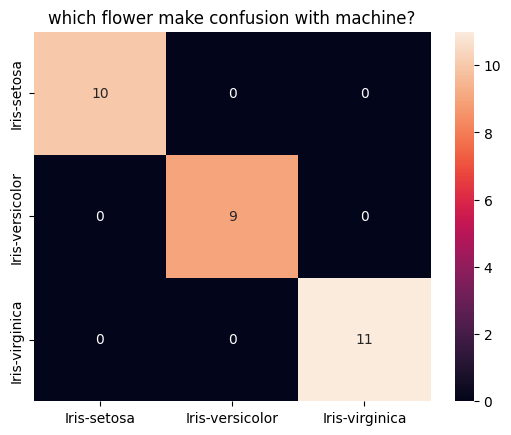

In [157]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("which flower make confusion with machine?")
plt.show()

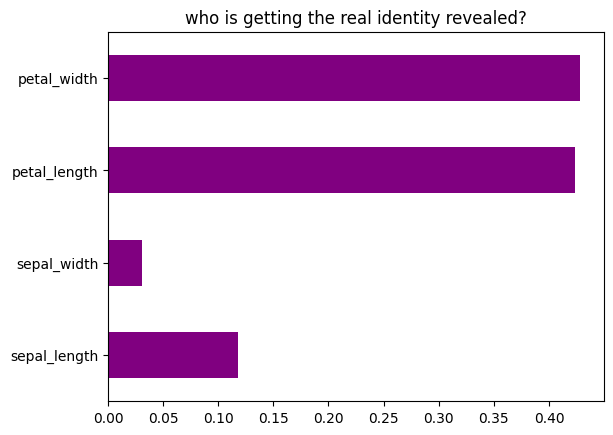

In [158]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', color='purple')
plt.title("who is getting the real identity revealed?")
plt.show()

In [159]:
# Format: [SepalLength, SepalWidth, PetalLength, PetalWidth]
my_flower = [[5.1, 3.5, 1.4, 0.2]] # is to be sentosa
pred = model.predict(my_flower)
print(f"Machine says this flower is: {le.inverse_transform(pred)[0]}")

Machine says this flower is: Iris-setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
